# Focos de Calor - Incêndios Florestais de 1998 - 2020

Base extraída do site de dados públicos do INPE: http://queimadas.dgi.inpe.br/queimadas/portal-static/estatisticas_estados/

Tutoriais para aprendizado do ARIMA : 
- https://www.vooo.pro/insights/guia-completo-para-criar-time-series-com-codigo-em-python/
- https://ichi.pro/pt/previsao-de-temperatura-com-modelo-arima-em-python-73096807304019
- https://github.com/minerandodados/mdrepo/blob/164cf328d0e007de260666d75a84bbf76defd2c3/Arima-Tutorial.ipynb
- https://github.com/IvanildoBatista/Series-Temporais/blob/master/AutoARIMA/Aplicando%20AutoARIMA%20em%20Python.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13,5)

import plotly.offline as py
import plotly.graph_objs as go

#Função para mostrar o gráfico no notebook
py.init_notebook_mode(connected=True)

In [2]:
from datetime import datetime

def transform_data (year, month):
    months = {
        'Janeiro' : '01',
        'Fevereiro' : '02',
        'Março': '03',
        'Abril': '04',
        'Maio': '05',
        'Junho': '06',
        'Julho': '07',
        'Agosto': '08',
        'Setembro': '09',
        'Outubro': '10',
        'Novembro': '11',
        'Dezembro': '12'
    }
    
    data = datetime.strptime(str(year) + '-' + months[month] + '-01', '%Y-%m-%d')
    
    return data

In [3]:
transform_data(2020, 'Janeiro')

datetime.datetime(2020, 1, 1, 0, 0)

In [4]:
archive = 'base_completa_foco_calor.csv'

base = pd.read_csv(archive)
#base['date'] = pd.to_datetime(base.date)
base

,year,number,month,state
0,1998,0,Janeiro,Acre
1,1999,0,Janeiro,Acre
2,2000,0,Janeiro,Acre
3,2001,0,Janeiro,Acre
4,2002,0,Janeiro,Acre
...,...,...,...,...
7759,2017,81,Dezembro,Tocantins
7760,2018,166,Dezembro,Tocantins
7761,2019,219,Dezembro,Tocantins
7762,2020,211,Dezembro,Tocantins


In [5]:
# Retirada dos dados de 2021
base = base[base['year'] < 2021].reset_index(drop=True)

In [6]:
base['data'] =  base.apply(lambda x: transform_data(x.year, x.month), axis=1)

In [7]:
base['data']

0      1998-01-01
1      1999-01-01
2      2000-01-01
3      2001-01-01
4      2002-01-01
          ...    
7447   2016-12-01
7448   2017-12-01
7449   2018-12-01
7450   2019-12-01
7451   2020-12-01
Name: data, Length: 7452, dtype: datetime64[ns]

In [8]:
base.tail(5)

,year,number,month,state,data
7447,2016,115,Dezembro,Tocantins,2016-12-01
7448,2017,81,Dezembro,Tocantins,2017-12-01
7449,2018,166,Dezembro,Tocantins,2018-12-01
7450,2019,219,Dezembro,Tocantins,2019-12-01
7451,2020,211,Dezembro,Tocantins,2020-12-01


In [9]:
# Informações sobre os dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7452 entries, 0 to 7451
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    7452 non-null   int64         
 1   number  7452 non-null   int64         
 2   month   7452 non-null   object        
 3   state   7452 non-null   object        
 4   data    7452 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 291.2+ KB


In [10]:
base.describe()

,year,number
count,7452.000000,7452.000000
mean,2009.000000,681.952630
std,6.633695,1968.740691
min,1998.000000,0.000000
25%,2003.000000,12.000000
50%,2009.000000,76.000000
75%,2015.000000,395.250000
max,2020.000000,37231.000000


In [11]:
base['number'].max()

37231

In [12]:
# Função para Série Temporal

def plot_forest_fires_timeline(df, title_graph):
    
    dataTemp = df.groupby(['year']).agg({'number': 'sum'}).reset_index()
    
    dataTemp['3-years-SMA'] = dataTemp['number'].rolling(window=3).mean()
    
    graph = go.Scatter(x = dataTemp['year'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    mode = 'markers+lines+text',
                    name = 'Focos de Calor',
                    textposition= 'top center'
                    )
    
    graph_sma = go.Scatter(x = dataTemp['year'],
                    y = dataTemp['3-years-SMA'],
                    mode = 'markers+lines',
                    name = 'Média Móvel do Triênio'
                    )
    
    data = [graph, graph_sma]

    layout = go.Layout(title = title_graph,
                      xaxis = {'title': 'Ano'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=450, 
                      width=1000,
                      legend=dict(
                        yanchor="top",
                        y= 0.95,
                        xanchor="right",
                        x=0.98,
                        bgcolor='rgba(255, 255, 255, 0)'
                      ))
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)
    

In [13]:
plot_forest_fires_timeline(base, 'Série Temporal dos Focos de Calor')

In [14]:
# Função para Gráfico de Barras

def plot_forest_fires_state(df, title_graph, modeGraphBar):
    
    dataTemp = df.groupby(['state']).agg({'number': 'sum'}).sort_values(
        by=['state']).reset_index()
    
    if modeGraphBar:
        graph = go.Bar(x = dataTemp['state'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    textposition='auto'
                    )
    else:
        graph = go.Scatter(x = dataTemp['state'],
                    y = dataTemp['number'],
                    mode = 'markers',
                    marker=dict(
                        size=dataTemp['number']/100,
                        sizemode='area',
                        color='rgb(255, 65, 54)',
                        sizemin=4,
                        line_width=2
                        )
                    )    
    
    data = [graph]

    layout = go.Layout(title = title_graph,
                      xaxis = {'title': 'Estado'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=600, 
                      width=1000)
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)

In [15]:
plot_forest_fires_state(base, 'Número de Focos de Calor por Estado', True)

In [16]:
# Função para Gráfico de Barras

def plot_forest_fires_month(df):
    
    dataTemp = df.groupby(['month']).agg({'number': 'sum'}).sort_values(
        by=['number'], ascending=False).reset_index()
    
    
    graph = go.Bar(x = dataTemp['month'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    textposition='auto'
                    )
    
    
    data = [graph]

    layout = go.Layout(title = 'Número de Focos de Calor por Mês',
                      xaxis = {'title': 'Estado'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=600, 
                      width=900)
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)

In [17]:
plot_forest_fires_month(base)

In [18]:
# Histograma dos focos de calor

def plot_histogram(df):

    graph = go.Histogram(x=df['number']) 

                          
    data = [graph]
    
    layout = go.Layout(title = 'Histograma dos Números de Focos de Calor',
                   xaxis = {'title': 'Distribuição'},
                   yaxis = {'title': 'Frequência'})
    
    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig)

In [19]:
plot_histogram(base)

In [20]:
# Boxplot do número de focos de calor

def plot_box_plot(df):
    
    graph = go.Box(y = df[df['state'] == 'Mato Grosso']['number'],
                name = 'Mato Grosso')
    
    graph1 = go.Box(y = df[df['state'] == 'Pará']['number'],
                name = 'Pará')
    
    graph2 = go.Box(y = df[df['state'] == 'Maranhão']['number'],
                name = 'Maranhão')
    
    data = [graph, graph1, graph2]
    
    layout = go.Layout(title = 'BoxPlot dos Números de Focos de Calor',
                      height=600, 
                      width=1000)
    
    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig)

In [21]:
plot_box_plot(base)

In [22]:
# Série Temporal dos Focos de Calor - Mato Grosso
base_temp = base.loc[base['state'] == 'Mato Grosso']
plot_forest_fires_timeline(base_temp, 'Série Temporal dos Focos de Calor - Mato Grosso')

In [23]:
# Série Temporal dos Focos de Calor - Pará
base_temp = base.loc[base['state'] == 'Pará']
plot_forest_fires_timeline(base_temp, 'Série Temporal dos Focos de Calor - Pará')

In [24]:
#Bubble Chart do Número de Focos de Calor por Estado - Setembro
base_temp = base.loc[base['month'] == 'Setembro']
plot_forest_fires_state(base_temp, 'Número de Focos de Calor por Estado - Setembro', False)

In [25]:
# Função para Gráfico de Barras

def plot_forest_fires_state_max_month(df, months, title_graph):
    
    data = []
    
    for month in months:
        dataTemp = df[df['month'] == month].groupby(['state']).agg(
            {'number': 'sum'}).nlargest(3, 'number').reset_index()
    
    
        graph= go.Bar(x = dataTemp['state'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    textposition='auto',
                    name = month
                    )
    
    
        data.append(graph)
        

    layout = go.Layout(title = title_graph,
                      xaxis = {'title': 'Estado'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=600, 
                      width=1000,
                      legend=dict(
                        yanchor='top',
                        y=0.98,
                        xanchor='right',
                        x=0.99,
                        bgcolor='rgba(255, 255, 255, 0)'
                      ))
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)

In [26]:
# Gráfico de barras dos Estados com Maiores Focos de Calor em Agosto, Setembro e Outubro
title = 'Estados com Maiores Focos de Calor em Agosto, Setembro e Outubro'
plot_forest_fires_state_max_month(base, ['Agosto', 'Setembro', 'Outubro'], title )

In [27]:
#Bubble Chart do Número de Focos de Calor por Estado - 2020
base_temp = base.loc[base['year'] == 2020]
plot_forest_fires_state(base_temp, 'Número de Focos de Calor por Estado - 2020', False)

# Datasets Pará, Minas Gerais e Maranhão

In [28]:
base_PA = base[base['state'] == 'Pará']
base_PA.set_index('data', inplace = True)
base_PA

,year,number,month,state
data,,,,
1998-01-01,1998,0,Janeiro,Pará
1999-01-01,1999,87,Janeiro,Pará
2000-01-01,2000,30,Janeiro,Pará
2001-01-01,2001,34,Janeiro,Pará
2002-01-01,2002,144,Janeiro,Pará
...,...,...,...,...
2016-12-01,2016,3051,Dezembro,Pará
2017-12-01,2017,4879,Dezembro,Pará
2018-12-01,2018,1005,Dezembro,Pará


In [29]:
base_MG = base[base['state'] == 'Minas Gerais']
base_MG.set_index('data', inplace = True)
base_MG

,year,number,month,state
data,,,,
1998-01-01,1998,0,Janeiro,Minas Gerais
1999-01-01,1999,36,Janeiro,Minas Gerais
2000-01-01,2000,24,Janeiro,Minas Gerais
2001-01-01,2001,18,Janeiro,Minas Gerais
2002-01-01,2002,29,Janeiro,Minas Gerais
...,...,...,...,...
2016-12-01,2016,90,Dezembro,Minas Gerais
2017-12-01,2017,61,Dezembro,Minas Gerais
2018-12-01,2018,92,Dezembro,Minas Gerais


In [73]:
base_BA = base[base['state'] == 'Bahia']
base_BA.set_index('data', inplace = True)
base_BA

,year,number,month,state
data,,,,
1998-01-01,1998,0,Janeiro,Bahia
1999-01-01,1999,114,Janeiro,Bahia
2000-01-01,2000,31,Janeiro,Bahia
2001-01-01,2001,25,Janeiro,Bahia
2002-01-01,2002,124,Janeiro,Bahia
...,...,...,...,...
2016-12-01,2016,163,Dezembro,Bahia
2017-12-01,2017,66,Dezembro,Bahia
2018-12-01,2018,119,Dezembro,Bahia


In [74]:
base_PA = base_PA.asfreq(freq='MS')
base_MG = base_MG.asfreq(freq='MS')
base_BA = base_BA.asfreq(freq='MS')

## Verificando Estacionariedade

**Dickey-Fuller** teste: esse é um dos testes estatísticos para verificar Estacionaridade. Aqui, a hipótese nula é que o TS é não-estacionária. Os resultados do teste são compostos por uma estatística de teste e alguns valores críticos para os níveis de confiança da diferença. Se o ‘teste estatístico’ é menor do que o “valor crítico”, podemos rejeitar a hipótese nula e dizer que a série é estacionária.

- Caso p-value > 0.05: Série não é estacionária e deve ser manipulada.
- Caso p-value <= 0.05: Série é estacionária e a predição pode ser realizada.

In [75]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['ADF','P-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

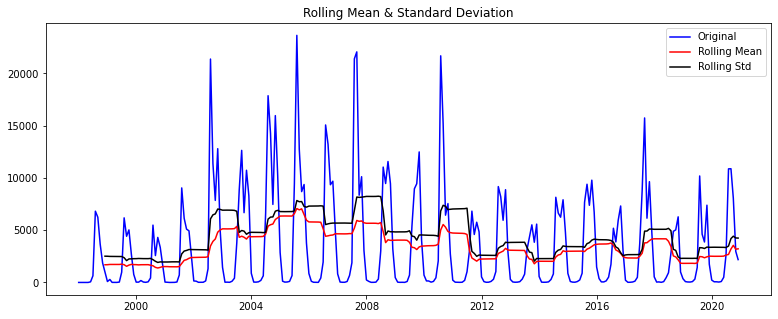

Results of Dickey-Fuller Test:
ADF                             -2.161114
P-value                          0.220660
#Lags Used                      11.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
Critical Value (10%)            -2.572638
dtype: float64


In [76]:
#Testando se os dados de treino são estacionários - Pará
test_stationarity(base_PA['number'])

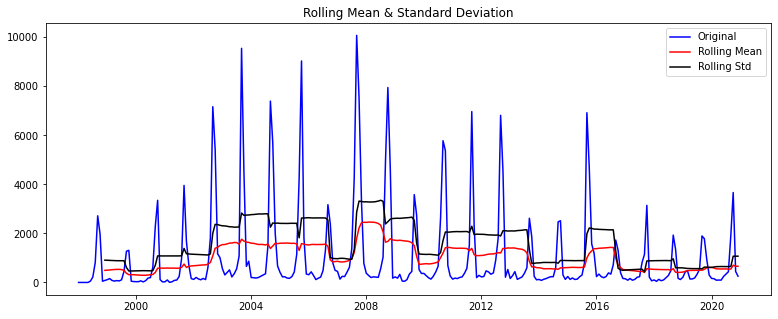

Results of Dickey-Fuller Test:
ADF                             -2.833091
P-value                          0.053700
#Lags Used                      13.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


In [77]:
#Testando se os dados de treino são estacionários - Bahia
test_stationarity(base_BA['number'])

Percebe-se que as séries não são estacionárias estacionária dado que o P-value é maior que 0.05, dessa forma é necessário 
transformá-las em séries estacionárias, para isso será utilizado o método por diferenciação, pois a mesma trata da tendência e da sazonalidade.

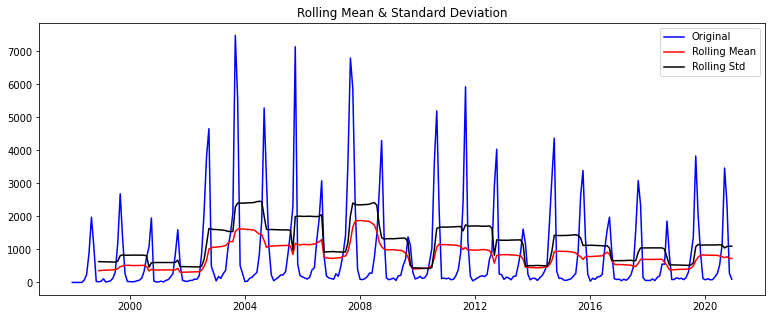

Results of Dickey-Fuller Test:
ADF                             -3.320669
P-value                          0.013979
#Lags Used                      13.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


In [78]:
#Testando se os dados de treino são estacionários - Minas Gerais
test_stationarity(base_MG['number'])

P-value menor do que 0.05, característica de série estacionária.

In [79]:
'''
Uso do Método por Diferenciação para gerar uma série estacionária
''' 

diff_PA= base_PA['number'].diff(1).fillna(0) 
diff_BA= base_BA['number'].diff(1).fillna(0) 

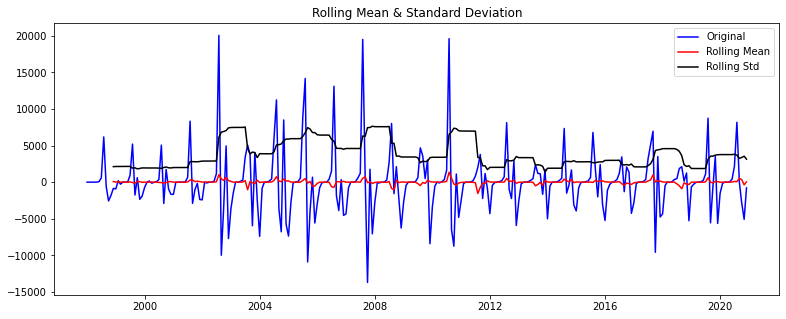

Results of Dickey-Fuller Test:
ADF                           -1.796012e+01
P-value                        2.818856e-30
#Lags Used                     1.000000e+01
Number of Observations Used    2.650000e+02
Critical Value (1%)           -3.455270e+00
Critical Value (5%)           -2.872509e+00
Critical Value (10%)          -2.572615e+00
dtype: float64


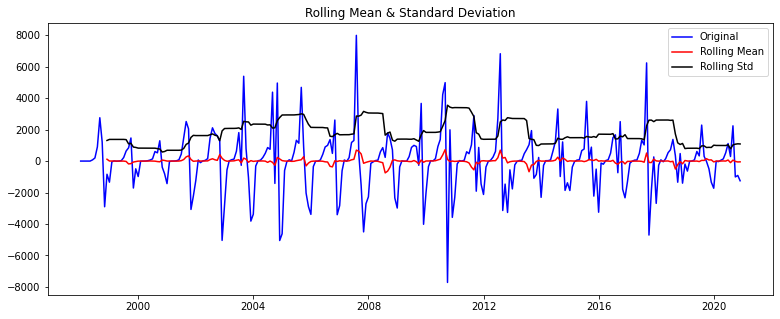

Results of Dickey-Fuller Test:
ADF                           -1.345984e+01
P-value                        3.547718e-25
#Lags Used                     1.000000e+01
Number of Observations Used    2.650000e+02
Critical Value (1%)           -3.455270e+00
Critical Value (5%)           -2.872509e+00
Critical Value (10%)          -2.572615e+00
dtype: float64


In [80]:
# Verificando se a mesma já está estacionária

test_stationarity(diff_PA)

test_stationarity(diff_MA)

Percebe-se que o P-value ficou abaixo de 0.05 e abaixo do valor crítico de 1%, dessa forma a série está estacionária com 99% de confiança. Somente uma diferenciação já deixa a série estacionária.

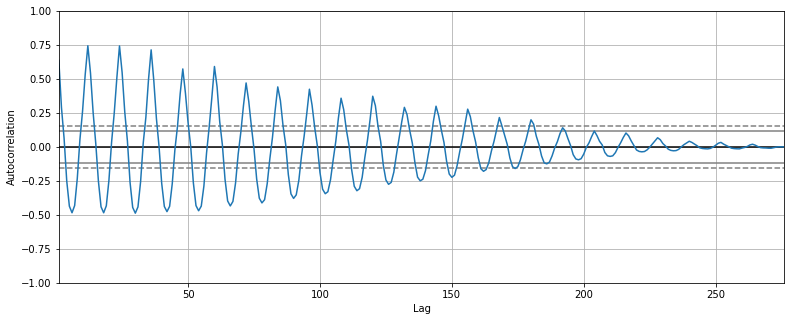

In [81]:
# Verificando Autocorrelação
from pandas.plotting import autocorrelation_plot

# autocorrelation plot 
autocorrelation_plot(base_PA['number'])
plt.show()

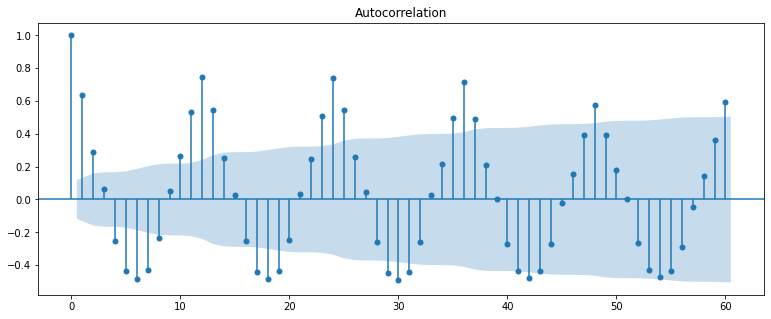

In [82]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(base_PA['number'], lags=60)
plt.show()

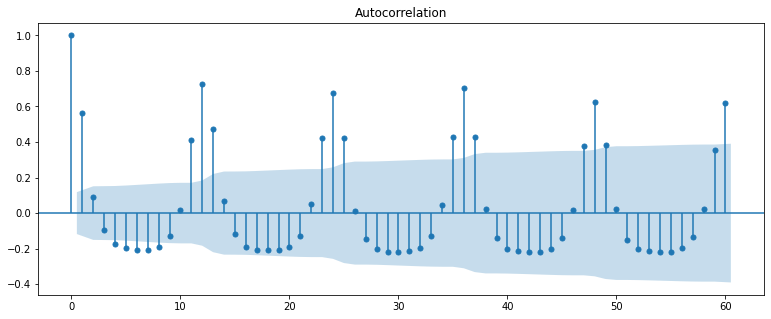

In [83]:
plot_acf(base_BA['number'], lags=60)
plt.show()

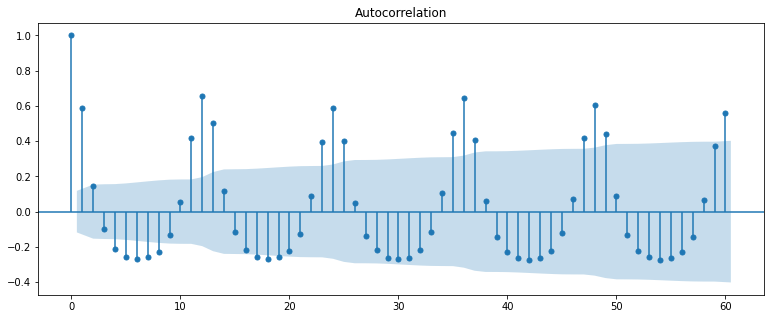

In [84]:
plot_acf(base_MG['number'], lags=60)
plt.show()

## ARIMA

Após tornar a série estacionária, é aplicado o modelo ARIMA para previsão. ARIMA é composto por 3 termos (Auto-Regressão + Integrado + Média Móvel) e estes componentes são representados pelos parâmetros **p**, **d** e **q**.

Para descobrir a melhor combinação de parâmetros, será utilizada a biblioteca **pmdarima**. Através da função auto_arima, ele utiliza pontuação AIC para descobrir o melhor modelo preditivo.

O modelo arima contém alguns parâmetros

**ARIMA(p,d,q)**
- **p**: O número de lags que foram devem ser incluídos no modelo.
- **d**: O número de vezes que as observações serão diferenciadas.
- **q**: O tamanho de uma janela de média móvel. Também chamada de ordem de média móvel.

### Separando base de treino e teste

In [87]:
train_data_PA = base_PA['number'].loc['1998-01-01':'2019-12-01']
train_data_MG = base_MG['number'].loc['1998-01-01':'2019-12-01']
train_data_BA = base_BA['number'].loc['1998-01-01':'2019-12-01']

In [88]:
test_data_PA = base_PA['number'].loc['2020-01-01':'2020-12-01']
test_data_MG = base_MG['number'].loc['2020-01-01':'2020-12-01']
test_data_BA = base_BA['number'].loc['2020-01-01':'2020-12-01']

### Aplicando PMDARIMA

In [89]:
import pmdarima as pmd

# Definição do modelo para as bases dos estados

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                                      start_p=1, 
                                      start_q=1,
                                      m=12,
                                      trace = True,
                                      suppress_warnings=True,
                                      stepwise=True)
    return autoarima_model

### Pará

In [90]:
# Treino do Modelo
model_PA = arimamodel(train_data_PA)
model_PA.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=4949.135, Time=1.70 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5224.086, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4961.077, Time=1.49 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=5057.031, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5334.748, Time=0.01 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=5033.167, Time=0.16 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=4964.031, Time=1.32 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=4916.488, Time=4.37 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=4915.829, Time=2.63 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=4912.775, Time=3.63 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=4984.549, Time=1.15 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=4952.942, Time=3.43 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=4986.874, Time=2.01 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=7.10 sec
 ARIMA(0,0,2)(2,0,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  264
Model:             SARIMAX(1, 0, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -2436.621
Date:                                 Sun, 28 Mar 2021   AIC                           4885.241
Time:                                         16:29:31   BIC                           4906.697
Sample:                                              0   HQIC                          4893.863
                                                 - 264                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    128.6514    160.001      0.804      0.421    -184.946     442.248
ar.L1          0.4389      0.053      8.315      0.000       0.335       0.542
ar.S.L12       0.8963      0.023     39.454      0.000       0.852       0.941
ma.S.L12      -0.7083      0.032    -21.919      0.000      -0.772      -0.645
ma.S.L24       0.3139      0.044      7.202      0.000       0.229       0.399
sigma2      5.991e+06   2.61e+05     22.913      0.000    5.48e+06     6.5e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1129.83
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             1.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Minas Gerais

In [64]:
# Treino do Modelo
model_MG = arimamodel(train_data_MG)
model_MG.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=4299.260, Time=1.75 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4553.464, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4359.460, Time=0.66 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4399.999, Time=0.82 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4636.538, Time=0.01 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=4391.399, Time=0.62 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=4359.814, Time=1.54 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=4335.825, Time=4.76 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=4305.959, Time=6.30 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=4427.316, Time=0.11 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=4378.364, Time=3.46 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=4340.148, Time=3.58 sec
 ARIMA(1,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=7.44 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=4313.073, Time=2.96 sec
 ARIMA(1,0,0)(1,0,1)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  264
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -2143.630
Date:                            Sun, 28 Mar 2021   AIC                           4299.260
Time:                                    16:20:31   BIC                           4320.716
Sample:                                         0   HQIC                          4307.881
                                            - 264                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     28.7839     34.511      0.834      0.404     -38.856      96.424
ar.L1          0.3054      0.163      1.874      0.061      -0.014       0.625
ma.L1          0.1195      0.177      0.674      0.500      -0.228       0.467
ar.S.L12       0.9317      0.023     39.757      0.000       0.886       0.978
ma.S.L12      -0.6710      0.043    -15.626      0.000      -0.755      -0.587
sigma2      6.856e+05   3.03e+04     22.623      0.000    6.26e+05    7.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              2100.50
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             2.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Bahia

In [91]:
# Treino do Modelo
model_BA = arimamodel(train_data_BA)
model_BA.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=4443.363, Time=1.57 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4708.232, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4447.240, Time=1.72 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4507.961, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4781.861, Time=0.02 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=4501.435, Time=1.01 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=4448.153, Time=2.77 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=4442.384, Time=5.46 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=4429.707, Time=5.35 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=4434.986, Time=3.75 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=4427.941, Time=8.45 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=4409.407, Time=4.96 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=4400.187, Time=2.10 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=4508.903, Time=0.79 sec
 ARIMA(1,0,0)(1,0,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  264
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood               -2195.991
Date:                              Sun, 28 Mar 2021   AIC                           4399.983
Time:                                      16:31:06   BIC                           4414.287
Sample:                                           0   HQIC                          4405.731
                                              - 264                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4831      0.037     13.059      0.000       0.411       0.556
ar.S.L12       0.9579      0.010     94.007      0.000       0.938       0.978
ma.S.L12      -0.6582      0.031    -20.990      0.000      -0.720      -0.597
sigma2      9.354e+05   3.53e+04     26.488      0.000    8.66e+05       1e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1936.16
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             2.12
Prob(H) (two-sided):                  0.01   Kurtosis:                        15.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Teste

In [92]:
# Pará
prediction_PA = pd.DataFrame(model_PA.predict(n_periods = 12),index=test_data_PA.index)
prediction_PA.columns = ['predicted_numbers']
prediction_PA

,predicted_numbers
data,
2020-01-01,53.009425
2020-02-01,125.744970
2020-03-01,284.537199
2020-04-01,344.751266
2020-05-01,433.139786
2020-06-01,747.345668
2020-07-01,2001.995983
2020-08-01,5279.383472
2020-09-01,6878.962216


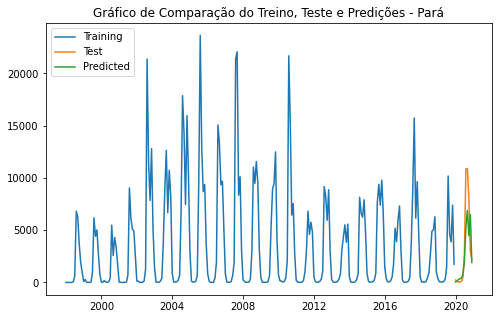

In [94]:
# Gráfico das predições - Pará

plt.figure(figsize=(8,5))
plt.plot(train_data_PA,label="Training")
plt.plot(test_data_PA,label="Test")
plt.plot(prediction_PA,label="Predicted")
plt.legend(loc = 'upper left')
plt.title('Gráfico de Comparação do Treino, Teste e Predições - Pará')
plt.show()

In [95]:
# Minas Gerais
prediction_MG = pd.DataFrame(model_MG.predict(n_periods = 12),index=test_data_MA.index)
prediction_MG.columns = ['predicted_numbers']
prediction_MG

,predicted_numbers
data,
2020-01-01,140.897078
2020-02-01,179.800027
2020-03-01,205.846576
2020-04-01,195.809745
2020-05-01,246.346742
2020-06-01,336.327084
2020-07-01,653.208239
2020-08-01,1119.012739
2020-09-01,2451.602317


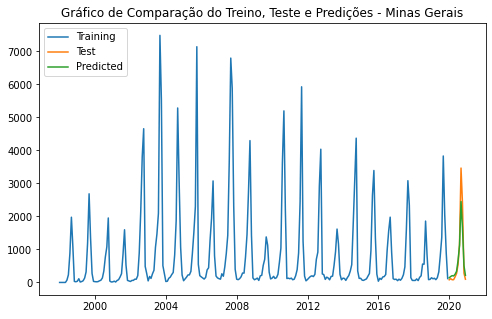

In [96]:
# Gráfico das predições - Minas Gerais

plt.figure(figsize=(8,5))
plt.plot(train_data_MG,label="Training")
plt.plot(test_data_MG,label="Test")
plt.plot(prediction_MG,label="Predicted")
plt.legend(loc = 'upper left')
plt.title('Gráfico de Comparação do Treino, Teste e Predições - Minas Gerais')
plt.show()

In [97]:
# Bahia
prediction_BA = pd.DataFrame(model_BA.predict(n_periods = 12),index=test_data_BA.index)
prediction_BA.columns = ['predicted_numbers']
prediction_BA

,predicted_numbers
data,
2020-01-01,200.147912
2020-02-01,227.428253
2020-03-01,258.032664
2020-04-01,117.133522
2020-05-01,132.492891
2020-06-01,198.928920
2020-07-01,284.047080
2020-08-01,587.289481
2020-09-01,2082.808790


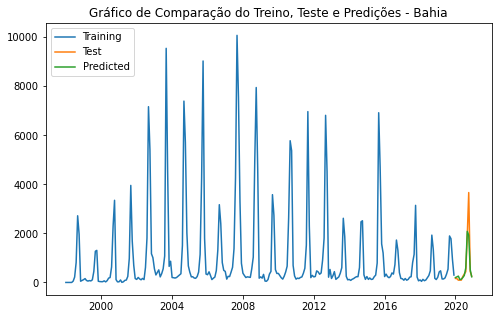

In [98]:
# Gráfico das predições - Pará

plt.figure(figsize=(8,5))
plt.plot(train_data_BA,label="Training")
plt.plot(test_data_BA,label="Test")
plt.plot(prediction_BA,label="Predicted")
plt.legend(loc = 'upper left')
plt.title('Gráfico de Comparação do Treino, Teste e Predições - Bahia')
plt.show()

In [99]:
# Avaliando os resultados
from numpy import sqrt
from sklearn.metrics import mean_squared_error

rmse_PA = sqrt(mean_squared_error(test_data_PA, prediction_PA))
print('Test RMSE - Pará: %.3f' % rmse_PA)

rmse_MG = sqrt(mean_squared_error(test_data_MG, prediction_MG))
print('Test RMSE - Minas Gerais: %.3f' % rmse_MG)

rmse_BA = sqrt(mean_squared_error(test_data_BA, prediction_BA))
print('Test RMSE - Bahia: %.3f' % rmse_BA)

Test RMSE - Pará: 2472.500
Test RMSE - Minas Gerais: 378.425
Test RMSE - Bahia: 510.157
